Hora de llegada: [  1.10505424   4.07203354   5.72225036   5.94147151   6.99007503
   7.25952032   8.3867468   11.20077441  12.15268422  13.68349041
  16.37565906  18.16087549  19.94020566  20.83905187  21.90324309
  24.88957718  27.63170101  29.82581602  32.52687434  33.16748128
  33.94367724  35.68288862  36.15317157  39.06573389  39.25813258
  41.13198656  42.98671978  43.92402028  46.9206046   49.70960803
  49.94868691  50.63553135  52.55937455  54.31103052  56.22562637
  59.06227384  61.00526257  61.91642265  62.26518152  63.26315789
  64.81228428  66.88256521  67.05415006  69.38001607  70.09259591
  70.12301902  71.75411823  74.19355211  75.76533994  76.85241452
  79.35588809  82.22243279  82.46767489  83.72980474  85.92421527
  86.34364365  86.80228018  87.12960157  87.99498137  88.42257454
  89.53471758  90.68835255  92.86457571  95.09148119  97.48006056
  99.57254651 100.59425535 101.26006974 103.28228846 105.29044402
 105.95279338 106.18966517 107.8953082  109.07299074 111.91

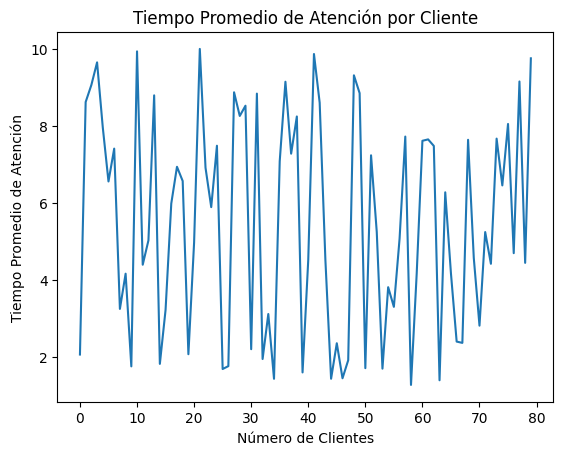

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Personas:  #Definimos la clase Persona
    def __init__(self, n_clientes, dt_max, tiempo_maximo_atencion, p_premium):
        self.n_clientes = n_clientes # Se almacena en numero de clientes
        hora_inicial =  0 # Inicualiza la hora de llegada del cliente
        self.hora_de_llegada = np.zeros(n_clientes) #Se genera un arreglo de
                                                  # horas
        dt_llegada = np.random.uniform(0, dt_max, n_clientes)

        self.tiempo_atencion = np.random.uniform(1, tiempo_maximo_atencion,
                                                 n_clientes)
         # Generamos el tiempo en que se le da atención por cliente

        for i in range(n_clientes):
            hora_inicial += dt_llegada[i] # Suma la llegada y la hora inicial
            self.hora_de_llegada[i] = hora_inicial # Otorga la hora de llegada
        #Se generan los tipos de cliente
        self.tipo_de_cliente = np.random.choice([0, 1], size=n_clientes,
                                                p=[1 - p_premium, p_premium])
         # definimos a 0 normales, 1 premium
        self.hora_de_salida = self.hora_de_llegada + self.tiempo_atencion
         # se calcula la hora de salida

    def __str__(self): # Se define la impresion de la clase
        cadena_de_impresion = ''
        cadena_de_impresion += 'Hora de llegada: ' + str(self.hora_de_llegada) + ' mins,\n'
        cadena_de_impresion += 'Tiempo de atención: ' + str(self.tiempo_atencion) + ' mins,\n'
        cadena_de_impresion += 'Hora de salida: ' + str(self.hora_de_salida) + ' mins,\n'
        # Genera la lista tipos de clientes
        tipos = ['Normal' if tipo == 0 else 'Premium' for tipo in
                 self.tipo_de_cliente]
        cadena_de_impresion += 'Tipos: ' + str(tipos)

        return cadena_de_impresion

class Cola:
    def __init__(self):
        self.cola = []

    def entrada(self, elemento):
        self.cola.append(elemento)

    def salida(self):
        if not self.vacio():
            return self.cola.pop(0)

    def vacio(self):
        return len(self.cola) == 0

class Simulacion:
    def __init__(self, n_clientes, n_servidores, proba, min_at, max_at,
                 min_inter, max_inter):
        self.cola_prioridad = Cola() # Inicia la cola tipo premier
        self.cola_normales = Cola() # Inicia la cola tipo normal
        self.n_clientes = n_clientes # alamacena numero ttal de clientes
        self.n_servidores = n_servidores # alamacena numero total de servidores
        self.proba = proba # aalmacena la pronba de tipo premier
        self.min_at = min_at
        self.max_at = max_at
        self.min_inter = min_inter
        self.max_inter = max_inter

        self.tiempos_promedio = []  # Almacena los tiempos promedios de atención
        self.generar_aleatorio()  # Generar datos aleatorios de servidores

    def generar_aleatorio(self):
        self.servidores = [np.random.uniform(self.min_at, self.max_at) for _ in
                           range(self.n_servidores)]
        print(f'Servidores generados: {self.servidores}')

    def simular(self):
        for i in range(self.n_clientes):
            if np.random.rand() < self.proba:  # Cliente premium
                self.cola_prioridad.entrada(i)
            else:  # Cliente normal
                self.cola_normales.entrada(i)


# Parámetros de la simulación
n_clientes = 80
dt_max = 3  # Intervalo máximo entre llegadas
tiempo_maximo_atencion = 30  # Tiempo máximo de atención
p_premium = 0.3  # Probabilidad de ser cliente premium
n_lineas = 19  # Número de líneas disponibles

clientes = Personas(n_clientes, dt_max, tiempo_maximo_atencion, p_premium)
print(clientes)

simulacion = Simulacion(n_clientes, n_lineas, p_premium, 1, 10, 1, 5)
simulacion.simular()

# Generar datos para el gráfico
tiempo_promedio = np.random.uniform(1, 10, n_clientes)
# Generar tiempos promedio aleatorios
plt.plot(range(n_clientes), tiempo_promedio)
plt.xlabel('Número de Clientes')
plt.ylabel('Tiempo Promedio de Atención')
plt.title('Tiempo Promedio de Atención por Cliente')
plt.show()